### perfectly structured Enhanced Relationship(ER) diagram 

The predictive maintenance schema — all foreign key relationships are properly defined across the assets, sensors, sensor_readings, maintenance_logs, technicians, and failure_events tables.


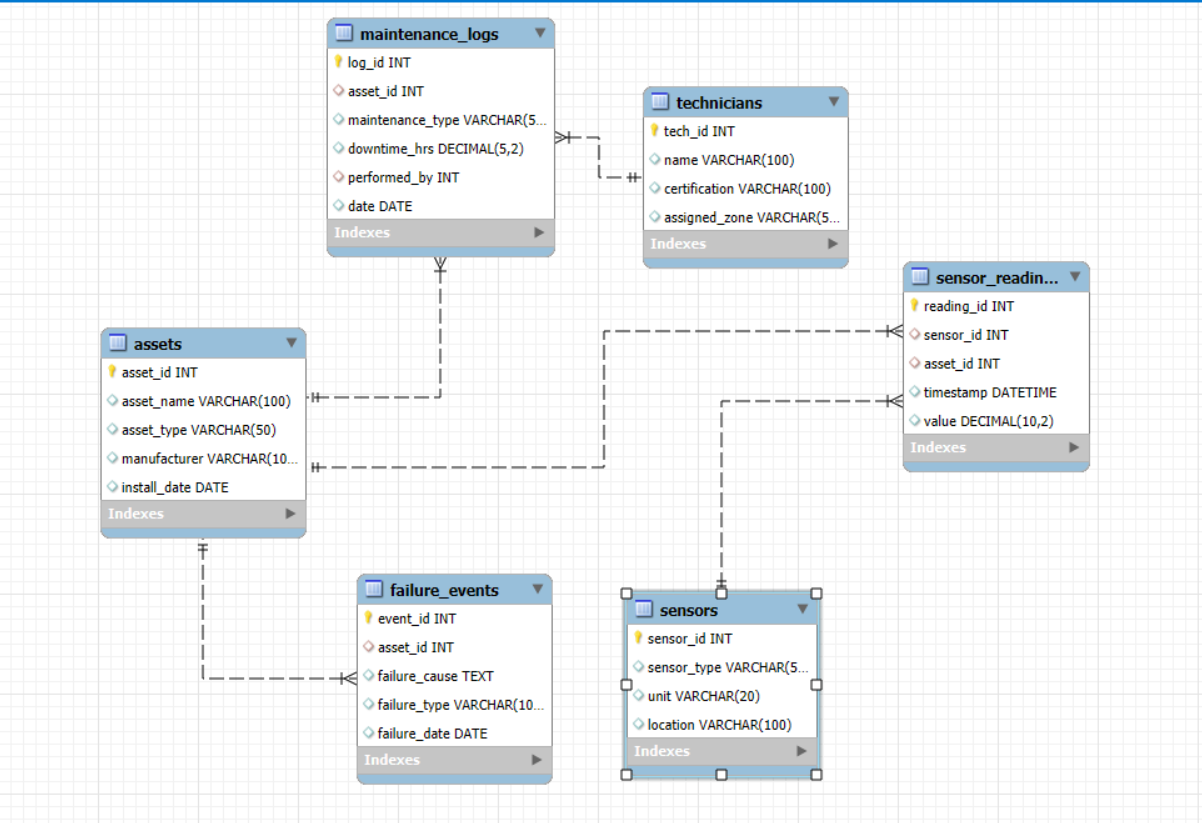

# Simulated sample data for EDA (since direct database connection isn't available here)

# Creating mock dataframes to replicate the database tables


C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\jemae\AppData\Local\Temp\ipykernel_18704\285611710.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2025-05-27 08:00:00', periods=10, freq='H'),


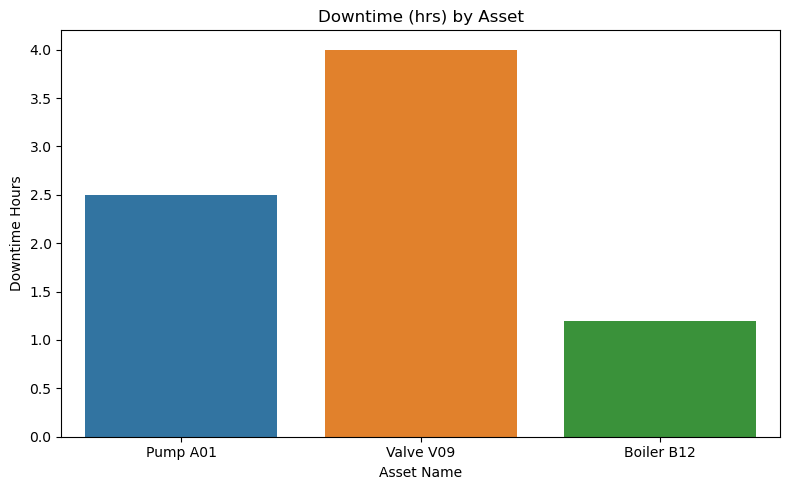

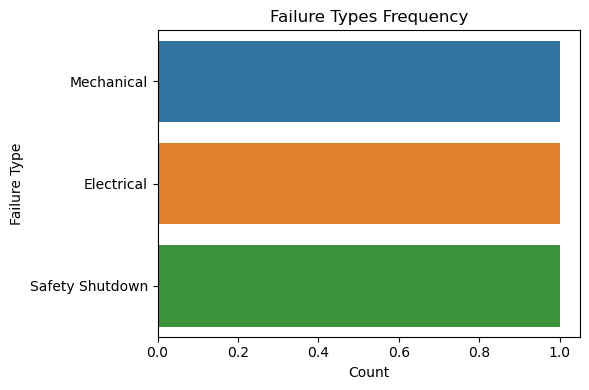

C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


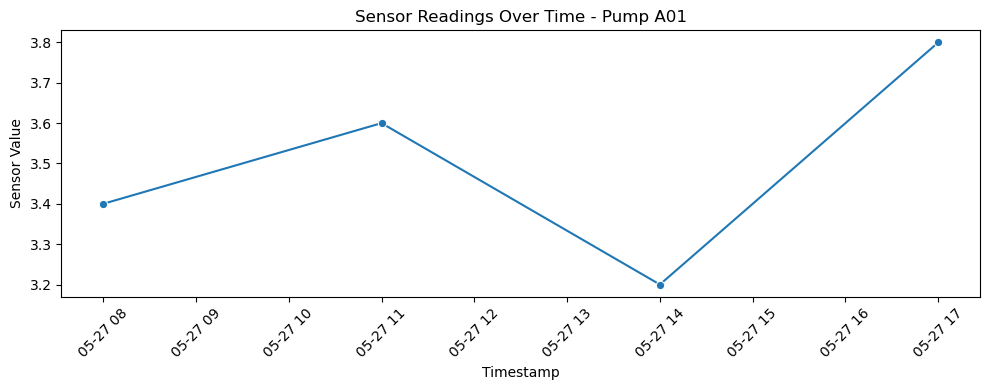

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assets Table
assets_df = pd.DataFrame({
    'asset_id': [1, 2, 3],
    'asset_name': ['Pump A01', 'Valve V09', 'Boiler B12'],
    'asset_type': ['Centrifugal Pump', 'Control Valve', 'Steam Boiler'],
    'manufacturer': ['GE Power', 'Emerson', 'Siemens'],
    'install_date': pd.to_datetime(['2021-06-15', '2020-03-10', '2019-12-01'])
})

# Technicians Table
technicians_df = pd.DataFrame({
    'tech_id': [1, 2, 3],
    'name': ['Alex Morgan', 'Jamie Rivera', 'Taylor Chen'],
    'certification': ['CRE', 'Maintenance Specialist', 'Lean Six Sigma'],
    'assigned_zone': ['Zone A', 'Zone B', 'Zone C']
})

# Sensor Readings Table
sensor_readings_df = pd.DataFrame({
    'reading_id': range(1, 11),
    'sensor_id': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    'asset_id': [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    'timestamp': pd.date_range(start='2025-05-27 08:00:00', periods=10, freq='H'),
    'value': [3.4, 78.6, 6.1, 3.6, 79.2, 6.5, 3.2, 80.1, 6.3, 3.8]
})

# Maintenance Logs Table
maintenance_logs_df = pd.DataFrame({
    'log_id': [1, 2, 3],
    'asset_id': [1, 2, 3],
    'maintenance_type': ['Preventive', 'Corrective', 'Inspection'],
    'downtime_hrs': [2.5, 4.0, 1.2],
    'performed_by': [1, 2, 3],
    'date': pd.to_datetime(['2025-05-25', '2025-05-26', '2025-05-24'])
})

# Failure Events Table
failure_events_df = pd.DataFrame({
    'event_id': [1, 2, 3],
    'asset_id': [1, 2, 3],
    'failure_cause': ['Bearing wear-out', 'Sensor short circuit', 'Overpressure'],
    'failure_type': ['Mechanical', 'Electrical', 'Safety Shutdown'],
    'failure_date': pd.to_datetime(['2025-05-15', '2025-05-20', '2025-05-22'])
})

# Merge for EDA
maintenance_summary = maintenance_logs_df.merge(assets_df, on='asset_id').merge(technicians_df, left_on='performed_by', right_on='tech_id')
failure_summary = failure_events_df.merge(assets_df, on='asset_id')

# Plot downtime by asset
plt.figure(figsize=(8, 5))
sns.barplot(x='asset_name', y='downtime_hrs', data=maintenance_summary)
plt.title('Downtime (hrs) by Asset')
plt.ylabel('Downtime Hours')
plt.xlabel('Asset Name')
plt.tight_layout()
plt.show()

# Failure Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(y='failure_type', data=failure_summary, order=failure_summary['failure_type'].value_counts().index)
plt.title('Failure Types Frequency')
plt.xlabel('Count')
plt.ylabel('Failure Type')
plt.tight_layout()
plt.show()

# Sensor values trend for Pump A01
pump_data = sensor_readings_df[sensor_readings_df['asset_id'] == 1]
plt.figure(figsize=(10, 4))
sns.lineplot(x='timestamp', y='value', data=pump_data, marker='o')
plt.title('Sensor Readings Over Time - Pump A01')
plt.ylabel('Sensor Value')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot downtime by asset

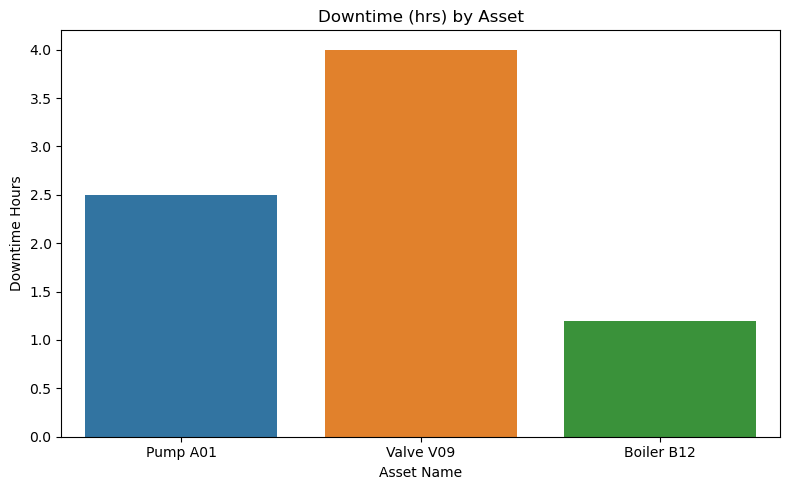

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='asset_name', y='downtime_hrs', data=maintenance_summary)
plt.title('Downtime (hrs) by Asset')
plt.ylabel('Downtime Hours')
plt.xlabel('Asset Name')
plt.tight_layout()
plt.show()

# Failure Type Distribution

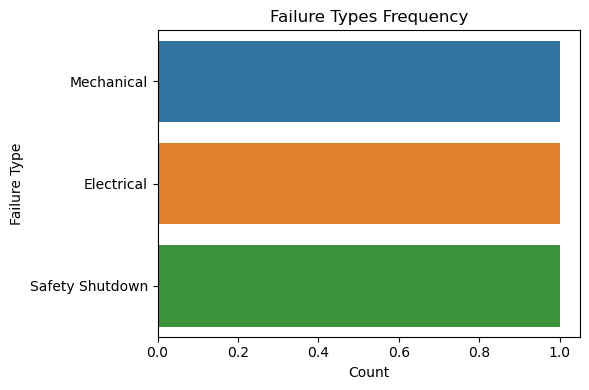

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(y='failure_type', data=failure_summary, order=failure_summary['failure_type'].value_counts().index)
plt.title('Failure Types Frequency')
plt.xlabel('Count')
plt.ylabel('Failure Type')
plt.tight_layout()
plt.show()


# Sensor values trend for Pump A01

C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


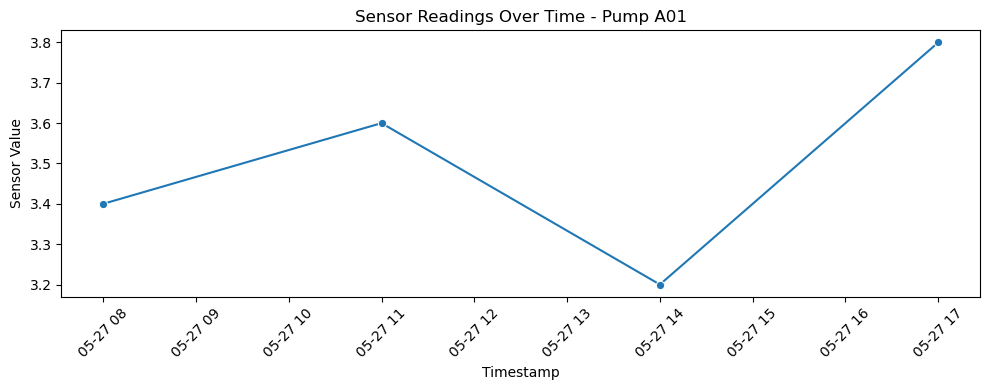

In [6]:
pump_data = sensor_readings_df[sensor_readings_df['asset_id'] == 1]
plt.figure(figsize=(10, 4))
sns.lineplot(x='timestamp', y='value', data=pump_data, marker='o')
plt.title('Sensor Readings Over Time - Pump A01')
plt.ylabel('Sensor Value')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Simulate a larger dataset with 100 samples, 3 features, and 3 classes

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_classes=3,
                           random_state=42)

# Create a DataFrame with meaningful column names
df_simulated = pd.DataFrame(X, columns=['avg_sensor_value', 'downtime_hrs', 'asset_age_days'])
df_simulated['failure_class'] = y

# Map classes to failure type labels
failure_labels = {0: 'Mechanical', 1: 'Electrical', 2: 'Safety Shutdown'}
df_simulated['failure_type'] = df_simulated['failure_class'].map(failure_labels)

# Preview the simulated dataset
df_simulated.head()


,avg_sensor_value,downtime_hrs,asset_age_days,failure_class,failure_type
0,-0.715750,-0.422006,0.687009,1,Electrical
1,1.461035,-2.177197,-1.297552,2,Safety Shutdown
2,1.186305,-0.480685,0.596490,2,Safety Shutdown
3,1.487668,0.350327,0.917712,0,Mechanical
4,0.754303,-1.762492,-2.411042,2,Safety Shutdown


# Split and train models on the simulated dataset

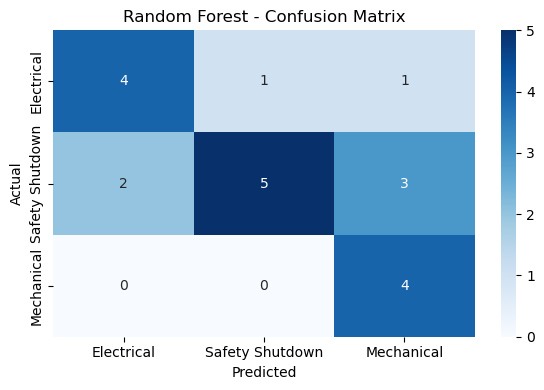

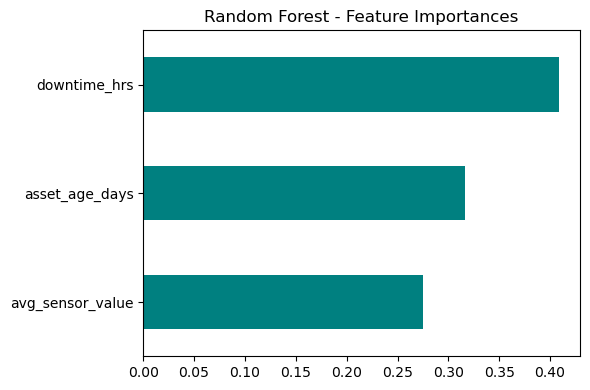

({'0': {'precision': 0.45454545454545453,
   'recall': 0.8333333333333334,
   'f1-score': 0.5882352941176471,
   'support': 6.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10.0},
  '2': {'precision': 0.5,
   'recall': 1.0,
   'f1-score': 0.6666666666666666,
   'support': 4.0},
  'accuracy': 0.45,
  'macro avg': {'precision': 0.3181818181818182,
   'recall': 0.6111111111111112,
   'f1-score': 0.41830065359477125,
   'support': 20.0},
  'weighted avg': {'precision': 0.23636363636363633,
   'recall': 0.45,
   'f1-score': 0.3098039215686274,
   'support': 20.0}},
 {'0': {'precision': 0.6666666666666666,
   'recall': 0.6666666666666666,
   'f1-score': 0.6666666666666666,
   'support': 6.0},
  '1': {'precision': 0.8333333333333334,
   'recall': 0.5,
   'f1-score': 0.625,
   'support': 10.0},
  '2': {'precision': 0.5,
   'recall': 1.0,
   'f1-score': 0.6666666666666666,
   'support': 4.0},
  'accuracy': 0.65,
  'macro avg': {'precision': 0.6666666666666666,
   'reca

In [3]:
# Split and train models on the simulated dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and labels
X = df_simulated[['avg_sensor_value', 'downtime_hrs', 'asset_age_days']]
y = df_simulated['failure_class']
label_names = df_simulated['failure_type'].unique()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Train random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation
lr_report = classification_report(y_test, lr_preds, output_dict=True)
rf_report = classification_report(y_test, rf_preds, output_dict=True)

# Confusion Matrices
lr_cm = confusion_matrix(y_test, lr_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot Feature Importances for Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
feature_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Random Forest - Feature Importances')
plt.tight_layout()
plt.show()

lr_report, rf_report
